In [26]:
import pandas as pd
import numpy as np
import datetime as dt

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

%matplotlib inline

In [30]:
data = pd.read_csv('goog.csv')
data.head(5)

,Date,Open,High,Low,Close,Volume
0,26-Feb-16,708.58,713.43,700.86,705.07,2239978
1,25-Feb-16,700.01,705.98,690.58,705.75,1631855
2,24-Feb-16,688.92,700.00,680.78,699.56,1958611
3,23-Feb-16,701.45,708.40,693.58,695.85,1999699
4,22-Feb-16,707.45,713.24,702.51,706.46,1946067


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 6 columns):
Date      19 non-null object
Open      19 non-null float64
High      19 non-null float64
Low       19 non-null float64
Close     19 non-null float64
Volume    19 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 992.0+ bytes


In [38]:
#data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True)
#data['Date']=data['Date'].map(dt.datetime.toordinal)
dates = list(data['Date'].apply(lambda x: int(x.split('-')[0])))
prices = list(data['Open'])

print (dates, prices)

[26, 25, 24, 23, 22, 19, 18, 17, 16, 12, 11, 10, 9, 8, 5, 4, 3, 2, 1] [708.58000000000004, 700.00999999999999, 688.91999999999996, 701.45000000000005, 707.45000000000005, 695.02999999999997, 710.0, 699.0, 692.98000000000002, 690.25999999999999, 675.0, 686.86000000000001, 672.32000000000005, 667.85000000000002, 703.87, 722.80999999999995, 770.22000000000003, 784.5, 750.46000000000004]


In [39]:
linear = LinearRegression()
dates = np.reshape(dates, (len(dates),1))
prices = np.reshape(prices, (len(prices),1))

linear.fit(dates,prices)

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

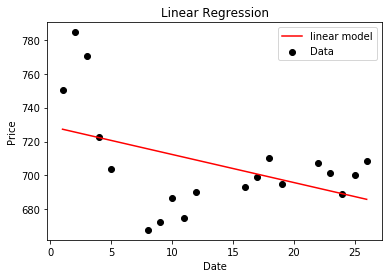

In [42]:
plt.scatter(dates, prices, color='black', label="Data")
plt.plot(dates, linear.predict(dates), color='red', label='linear model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Linear Regression')
plt.legend()
plt.show()